# Wavelength Quest
## Ruize Li (JE), Lab Partners: Nicholas Land (CC); Arthur Leaper (CL); Susie Lei (PE)

This is a notebook to generate nice plots for the presentation in the IB extended investigation. 

We measured wavelength of a laser in four different ways:
1. Varying slit number in Fraunhofer regime;
2. Varying slit width with single slit in Fraunhofer regime;
3. Varying slit width with five slits in Fraunhofer regime;
4. Varying number of half-wave plates in the Fresnel regime. 

Result was given by the average scaled by error, to minimise $\chi^2$. 
$$
\bar x=\frac{\sum_i(x_i/\sigma_i^2)}{\sum_i(1/\sigma_i^2)};\qquad \sigma_{\bar x}=\sqrt{\frac{1}{\sum_i(1/\sigma_i^2)}}
$$

In [1]:
# Optimized version of the Dzhanibekov effect simulation with energy dissipation
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Do something to beautify the plots

%matplotlib inline

# Set formats
DARK=False
if(DARK==False):
    form='.k'
    plt.style.use(['default']) 
    fontcolor='k'
else:
    form='.w'
    plt.style.use(['dark_background'])
    fontcolor='w'


SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

params = {
    'font.family': 'serif',
    'font.size' : 16, 'axes.titlesize' : 16, 'axes.labelsize' : 16, 'axes.linewidth' : 1,
    # ticks
    'xtick.labelsize' : 16, 'ytick.labelsize' : 16, 'xtick.major.size' : 8, 'xtick.minor.size' : 4,
    'ytick.major.size' : 8, 'ytick.minor.size' : 4, 'xtick.major.width' : 1, 'xtick.minor.width' : 1,
    'ytick.major.width' : 1, 'ytick.minor.width' : 1, 'xtick.direction' : 'in', 'ytick.direction' : 'in',
    # markers
    'lines.markersize' : 4, 'lines.markeredgewidth' : 1, 'errorbar.capsize' : 5, 'lines.linewidth' : 1.5,
    #'lines.linestyle' : None, 'lines.marker' : None,
    'savefig.bbox' : 'tight', 'legend.fontsize' : 16,
    'axes.labelsize': 16, 'axes.titlesize':20, 'xtick.labelsize':16, 'ytick.labelsize':16,
    'backend': 'Agg', 'mathtext.fontset': 'dejavuserif',
    'figure.facecolor':'w',
    #pad
    'axes.labelpad':8,
    # ticks
    'xtick.major.pad': 7,   'xtick.minor.pad': 7,   
    'ytick.major.pad': 4, 'ytick.minor.pad': 4,
}
plt.rcParams.update(params)

In [2]:
# Set the common constants
L = 5.41 # in m is the length from the aperture to the screen. 

## Fourth Experiment: Fresnel Diffraction, half-wave plates

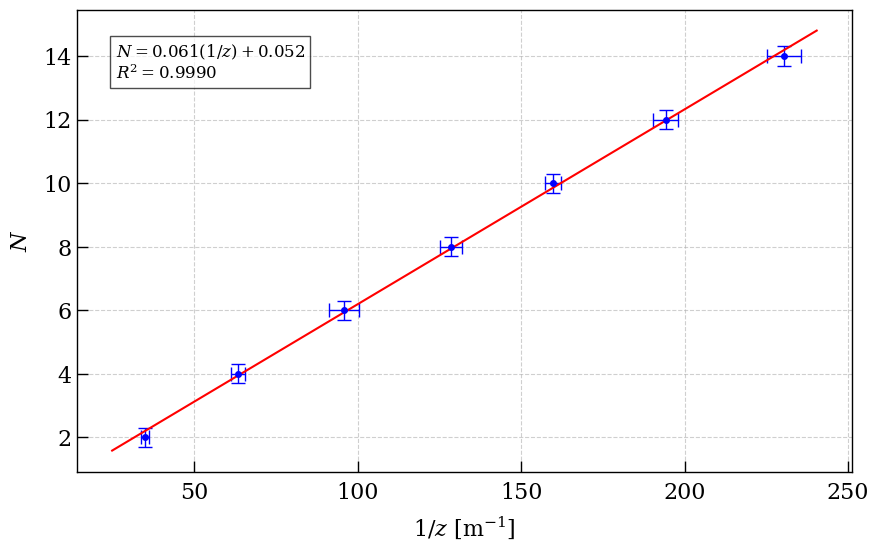

In [3]:
# Set data
N_values = np.array([14, 12, 10, 8, 6, 4, 2])
N_errors = np.array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])  # All errors are 0.3

inv_z_values = np.array([230.4, 194.2, 159.7, 128.5, 95.8, 63.4, 34.9])
inv_z_errors = np.array([5.31, 3.77, 2.55, 3.30, 4.59, 2.01, 1.22])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(inv_z_values, N_values)

# Generate fitted line
x_fit = np.linspace(min(inv_z_values) - 10, max(inv_z_values) + 10, 100)
y_fit = slope * x_fit + intercept

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data with error bars
ax.errorbar(inv_z_values, N_values, xerr=inv_z_errors, yerr=N_errors, fmt='o', 
            capsize=5, capthick=1, elinewidth=1, color='blue', label="Data with Errors")

# Plot fitted line
ax.plot(x_fit, y_fit, 'r-', label=f"Fit: $N = {slope:.3f} (1/z) + {intercept:.3f}$")

# Label the equation and R² value
eq_text = f"$N = {slope:.3f} (1/z) + {intercept:.3f}$\n$R^2 = {r_value**2:.4f}$"
ax.text(0.05, 0.85, eq_text, transform=ax.transAxes, fontsize=12, 
        bbox=dict(facecolor='white', alpha=0.7))

# Labels and title
ax.set_xlabel("$1/z$ [m$^{-1}$]")
ax.set_ylabel("$N$")

# Grid and legend
ax.grid(True, linestyle="--", alpha=0.6)

plt.show()


## Final Result

In [4]:
# Updated values and errors with the new data point
values = np.array([677, 649, 674, 652])
errors = np.array([18, 16, 18, 9])

# Compute weights as inverse of squared errors
weights = 1 / errors**2

# Compute weighted mean
weighted_mean = np.sum(values * weights) / np.sum(weights)

# Compute uncertainty in the weighted mean
weighted_error = np.sqrt(1 / np.sum(weights))

weighted_mean, weighted_error


(657.9462365591398, 6.677840098946423)

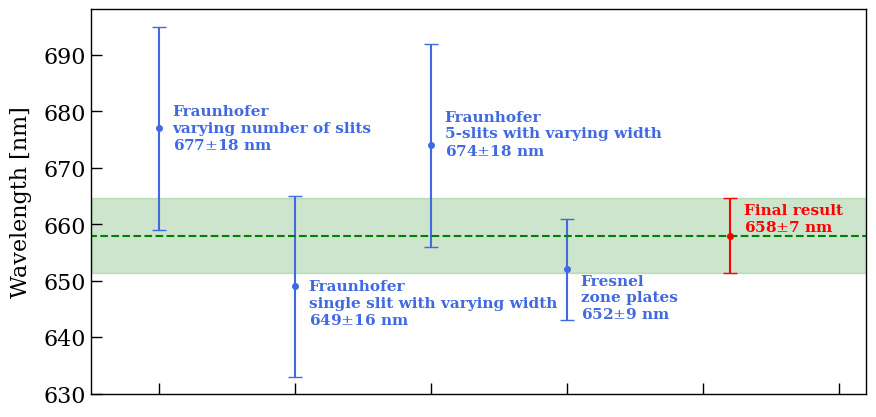

In [5]:
plot_values = np.append(values, weighted_mean)
plot_errors = np.append(errors, weighted_error)
labels = [f'Fraunhofer\nvarying number of slits\n{round(plot_values[0])}$\pm${round(plot_errors[0])} nm', f'Fraunhofer\nsingle slit with varying width\n{round(plot_values[1])}$\pm${round(plot_errors[1])} nm', f'Fraunhofer\n5-slits with varying width\n{round(plot_values[2])}$\pm${round(plot_errors[2])} nm', f'Fresnel\nzone plates\n{round(plot_values[3])}$\pm${round(plot_errors[3])} nm', f'Final result\n{round(plot_values[4])}$\pm${round(plot_errors[4])} nm']
colors = ['royalblue', 'royalblue', 'royalblue', 'royalblue', 'red']
y_tune = [0, -3, 2, -5, 3]


x_positions = [1,2,3,4,5.2]

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(plot_values)):
    ax.text(x_positions[i] + 0.1, plot_values[i]+y_tune[i], labels[i], fontsize=11, color = colors[i], verticalalignment='center', fontweight='bold')


ax.set_ylabel('Wavelength [nm]')
ax.errorbar([1,2,3,4], values, yerr = errors, fmt='o', color='royalblue')
ax.errorbar(5.2, weighted_mean, yerr = weighted_error, fmt='o', label='Data', color='red')
ax.hlines(weighted_mean, xmin = 0, xmax = 6.2, color='green', linestyles='dashed')

ax.axhspan(weighted_mean-weighted_error, weighted_mean+weighted_error, xmin=0, xmax=6, color='green', alpha=0.2)
ax.set_xticklabels([])  # Removes the labels
ax.set_xlim(0.5,6.2)
plt.show()